## PS 4


### Chen Anhua

### Q1

#### (a)

In [1]:
import pandas as pd
df_auto = pd.read_csv("Auto.csv",na_values="?")    # we found there exists "?" in the horsepower column

## Some cleaning
df_auto = df_auto.dropna()

# viewing
df_auto.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


#### (b)

In [2]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
plt.style.use('seaborn')

quant_var_lst = ["mpg", "cylinders", "displacement", "horsepower", 
                 "weight", "acceleration", "year", "origin"]
df_quant = df_auto[quant_var_lst]
pd.to_numeric(df_quant["horsepower"], errors='coerce')

df_quant.dtypes



mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
dtype: object

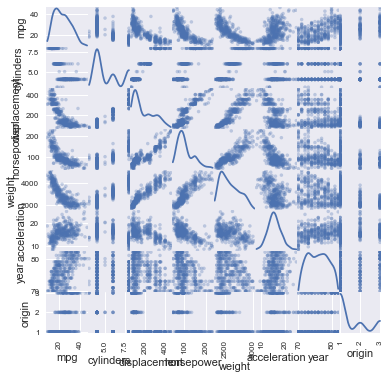

In [3]:
scatter_matrix(df_quant, alpha=0.3, figsize=(6, 6),
diagonal='kde')
plt.show()

#### (c)

In [4]:
df_quant.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


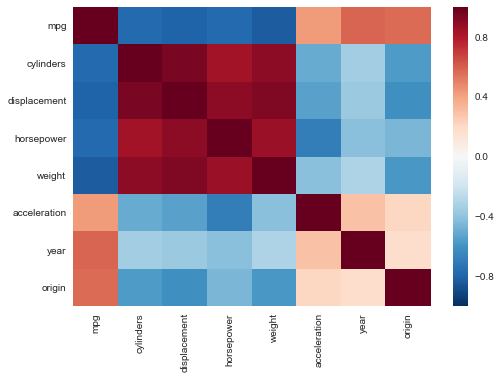

In [5]:
import seaborn as sb
sb.heatmap(df_quant.corr())
plt.show()

#### (d)

In [6]:
import statsmodels.api as sm
df_reg1 = df_quant
df_reg1["const"] = 1
reg1 = sm.OLS(endog=df_reg1["mpg"], exog=df_reg1.loc[:, df_reg1.columns != 'mpg'], missing='drop')

results = reg1.fit()
print(results.summary())

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 03 Feb 2018   Prob (F-statistic):          2.04e-139
Time:                        23:12:00   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.4934      0.323     -1.526   

##### i. coefficients of displacement, weight, year, origin are statistically significant at the 1% level
##### ii. coefficents of cylinders, horsepower and acceleration are not statistically signifiscant at the 10% level
##### iii. With one unit increase in year, a roughly 0.75 unit increase in mpg is associated with it. (without causality interpretation)

#### (e)

Displacement, horsepower and weight are the three variables that look most likely to have a nonlinear relationship with mpg

In [7]:
df_reg2 = df_quant
df_reg2["const"] = 1
for var in ["displacement", "horsepower", "weight", "acceleration"]:
    df_reg2[var+"_sqr"] = df_reg2[var]**2
reg2 = sm.OLS(endog=df_reg2["mpg"], exog=df_reg2.loc[:, df_reg1.columns != 'mpg'], missing='drop')

results2 = reg2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Sat, 03 Feb 2018   Prob (F-statistic):          1.75e-160
Time:                        23:12:00   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cylinders            0.2519      0.326  

##### ii. Adjusted R-square is 0.866 it's better than the regression in (d)
##### iii. The statistical significance of coefficent on displacement decreases hugely in this regression (from p-value of 0.008 in part(d) to p-value of 0.408). While the coefficient on its squared term is also not significant (even at 10% level) with a p-value of 0.532
##### iv. The statistical significance of coefficient on cylinders drops from 13% to more than 44% (less significant), though with a change of sign from being negative to positive (with less trustworthiness)

#### (f)

In [8]:
prediction = results2.predict(exog=[6, 200, 100, 3100, 15.1, 99, 1, 1, 200**2, 100**2, 3100**2, 15.1**2])
print("Predicted mpg is {}".format(prediction[0]))

Predicted mpg is 38.732111112737556


### Q2


#### (a)

In [9]:
def euclidean_dist(point_a, point_b = (0, 0, 0)):
    x1, x2, x3 = point_a
    y1, y2, y3 = point_b
    return ((x1 - y1) ** 2 + (x2 - y2) ** 2 + (x3 - y3) ** 2) ** 0.5
dat_train = [(0, 3, 0),
             (2, 0, 0),
             (0, 1, 3),
             (0, 1, 2),
             (-1, 0, 1),
             (1, 1, 1)]
dist = [euclidean_dist(p) for p in dat_train]
dist

[3.0,
 2.0,
 3.1622776601683795,
 2.23606797749979,
 1.4142135623730951,
 1.7320508075688772]

The distance above are in the order from 1 to 6

#### (b)

If K = 1, then KNN prediction will be Green, because the closet neighbor of the point is point 5 (with a distance of 1.41, which is green.

#### (c)

If K = 3, then KNN prediction will be Red, because among the three closest neighbor of the point, which are point 2, 5 and 6, two of them are Red, namely a conditional probability of $\frac{2}{3}$

#### (d)

We would expect K to be smaller, because smaller K would bring less smoothing to the classification, namely it will bring less bias while more variance to the non-parametric estimation (of boundary), well corresponding to the highly-nonlinear nature of the Bayes decision boundary (where the sqaured bias plus variance is minimized)

#### (e)

In [10]:
from sklearn import datasets, neighbors, linear_model
y_train  = ["red",
            "red",
            "red",
           "green",
           "green"]
x_train = dat_train[:-1]
knn = neighbors.KNeighborsClassifier(n_neighbors = 2)
print('KNN prediction: {}'.format(knn.fit(x_train, y_train).predict([(1,1,1)])[0]))

KNN prediction: green


### Q3

#### (a)

In [11]:
mpg_med = df_auto["mpg"].median()
df_auto["mpg_high"] = 0
df_auto.loc[df_auto["mpg"] >= mpg_med,["mpg_high"]] = 1

df_reg3 = df_auto.drop(["mpg", "name"], axis = 1)
df_reg3["const"] = 1

y = df_reg3["mpg_high"]
X = df_reg3.loc[:, df_reg3.columns != "mpg_high"]
reg3 = sm.Logit(endog= y, exog= X, missing='drop')

results3 = reg3.fit()
print(results3.summary())

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               mpg_high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Sat, 03 Feb 2018   Pseudo R-squ.:                  0.7101
Time:                        23:12:02   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.1626      0.423     -0.384      0.701      -0.992       0.667
displacement     0.0021

##### Coefficients on weight and year are statistically significant at 5% level

#### (b)

In [12]:

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X.loc[:, X.columns != "const"], y, test_size = 0.5, random_state=10)


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### (c)

In [13]:
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
logistic.fit(X_train, y_train)
print("Intercept is : {}".format(logistic.intercept_[0]))
print("Coefficients are: {}".format(logistic.coef_))

Intercept is : -0.07596480955190349
Coefficients are: [[-0.72681463  0.00705551 -0.03593928 -0.0051099  -0.12419645  0.29763985
  -0.1626257 ]]


#### (d)

In [14]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = logistic.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[86, 13],
       [12, 85]])

In [15]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.87      0.87        99
          1       0.87      0.88      0.87        97

avg / total       0.87      0.87      0.87       196



The prediction for the two are quite similar, with only a slightly better precision of low-mpg